# Perfusion Process Dynamics Visualization

This notebook visualizes the non-linear dynamics of a perfusion bioreactor system based on mass balance equations.

## Key Equations

**Mass Balance:**
$$P = B + H$$

**Biomass Dynamics:**
$$\frac{dX}{dt} = \mu \cdot X - B \cdot X$$

**Analytical Solution:**
$$X_i = X_0 \cdot e^{(\mu - B) \Delta t}$$

**Steady-State Condition:**
$$\frac{dX}{dt} = \frac{ds}{dt} = 0$$

Where:
- $X$ = biomass concentration
- $\mu$ = growth rate (day⁻¹)
- $B$ = bleed rate (day⁻¹)
- $P$ = perfusion rate (day⁻¹)
- $H$ = harvest rate (day⁻¹)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Color palette
colors = sns.color_palette("husl", 6)


## 1. Analytical Solution: Biomass Growth Over Time

Visualizing the analytical solution $X_i = X_0 \cdot e^{(\mu - B) \Delta t}$ for different parameter combinations.


/var/folders/jd/c82nbb150v12m21zq2k4xlzh0000gn/T/ipykernel_24314/551275425.py:43: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jycai/Development/Research Project Archive/sensor-physics/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


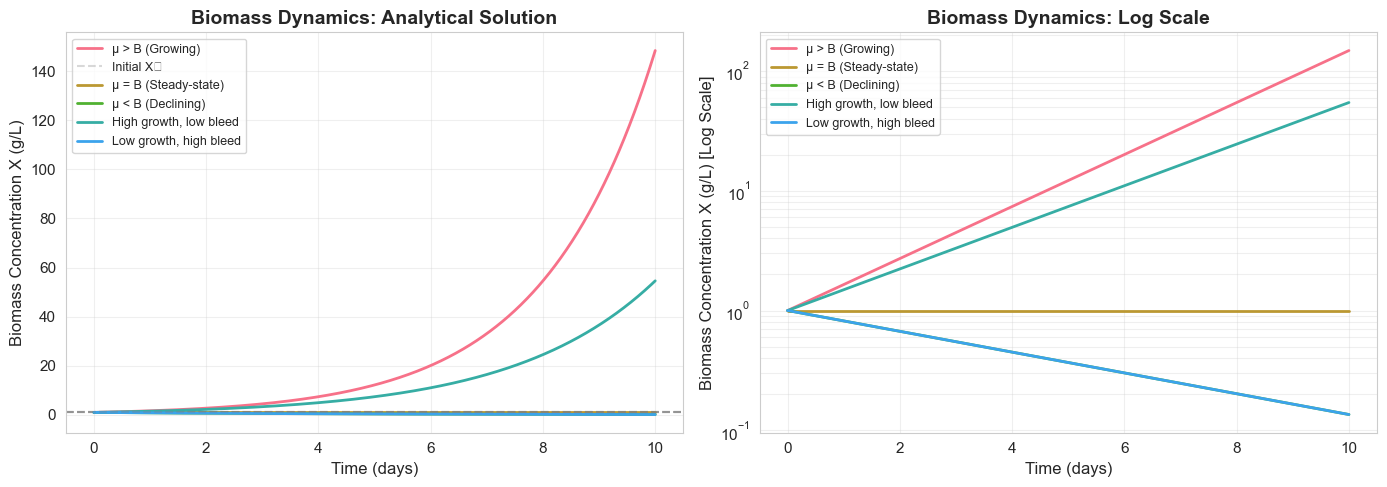

Key Observations:
μ > B (Growing)                | μ-B = +0.50 day⁻¹
  → Exponential growth
μ = B (Steady-state)           | μ-B = +0.00 day⁻¹
  → Approaching steady-state (dX/dt ≈ 0)
μ < B (Declining)              | μ-B = -0.20 day⁻¹
  → Exponential decline
High growth, low bleed         | μ-B = +0.40 day⁻¹
  → Exponential growth
Low growth, high bleed         | μ-B = -0.20 day⁻¹
  → Exponential decline


In [2]:
# Parameters
X0 = 1.0  # Initial biomass concentration (g/L)
t = np.linspace(0, 10, 1000)  # Time in days

# Different scenarios
scenarios = [
    {'μ': 0.8, 'B': 0.3, 'label': 'μ > B (Growing)', 'color': colors[0]},
    {'μ': 0.5, 'B': 0.5, 'label': 'μ = B (Steady-state)', 'color': colors[1]},
    {'μ': 0.3, 'B': 0.5, 'label': 'μ < B (Declining)', 'color': colors[2]},
    {'μ': 0.6, 'B': 0.2, 'label': 'High growth, low bleed', 'color': colors[3]},
    {'μ': 0.4, 'B': 0.6, 'label': 'Low growth, high bleed', 'color': colors[4]},
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Linear scale
for scenario in scenarios:
    μ = scenario['μ']
    B = scenario['B']
    X = X0 * np.exp((μ - B) * t)
    ax1.plot(t, X, label=scenario['label'], color=scenario['color'], linewidth=2)
    ax1.axhline(y=X0, color='gray', linestyle='--', alpha=0.3, label='Initial X₀' if scenario == scenarios[0] else '')

ax1.set_xlabel('Time (days)', fontsize=12)
ax1.set_ylabel('Biomass Concentration X (g/L)', fontsize=12)
ax1.set_title('Biomass Dynamics: Analytical Solution', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Log scale
for scenario in scenarios:
    μ = scenario['μ']
    B = scenario['B']
    X = X0 * np.exp((μ - B) * t)
    ax2.semilogy(t, X, label=scenario['label'], color=scenario['color'], linewidth=2)

ax2.set_xlabel('Time (days)', fontsize=12)
ax2.set_ylabel('Biomass Concentration X (g/L) [Log Scale]', fontsize=12)
ax2.set_title('Biomass Dynamics: Log Scale', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# Print key insights
print("Key Observations:")
print("=" * 60)
for scenario in scenarios:
    μ = scenario['μ']
    B = scenario['B']
    apparent_growth = μ - B
    print(f"{scenario['label']:30s} | μ-B = {apparent_growth:+.2f} day⁻¹")
    if abs(apparent_growth) < 0.01:
        print("  → Approaching steady-state (dX/dt ≈ 0)")
    elif apparent_growth > 0:
        print("  → Exponential growth")
    else:
        print("  → Exponential decline")


## 2. Phase Space: Growth Rate vs Bleed Rate

Visualizing how the apparent growth rate (μ - B) affects system behavior.


/var/folders/jd/c82nbb150v12m21zq2k4xlzh0000gn/T/ipykernel_24314/791098732.py:49: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jd/c82nbb150v12m21zq2k4xlzh0000gn/T/ipykernel_24314/791098732.py:49: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jd/c82nbb150v12m21zq2k4xlzh0000gn/T/ipykernel_24314/791098732.py:49: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jycai/Development/Research Project Archive/sensor-physics/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jycai/Development/Research Project Archive/sensor-physics/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print

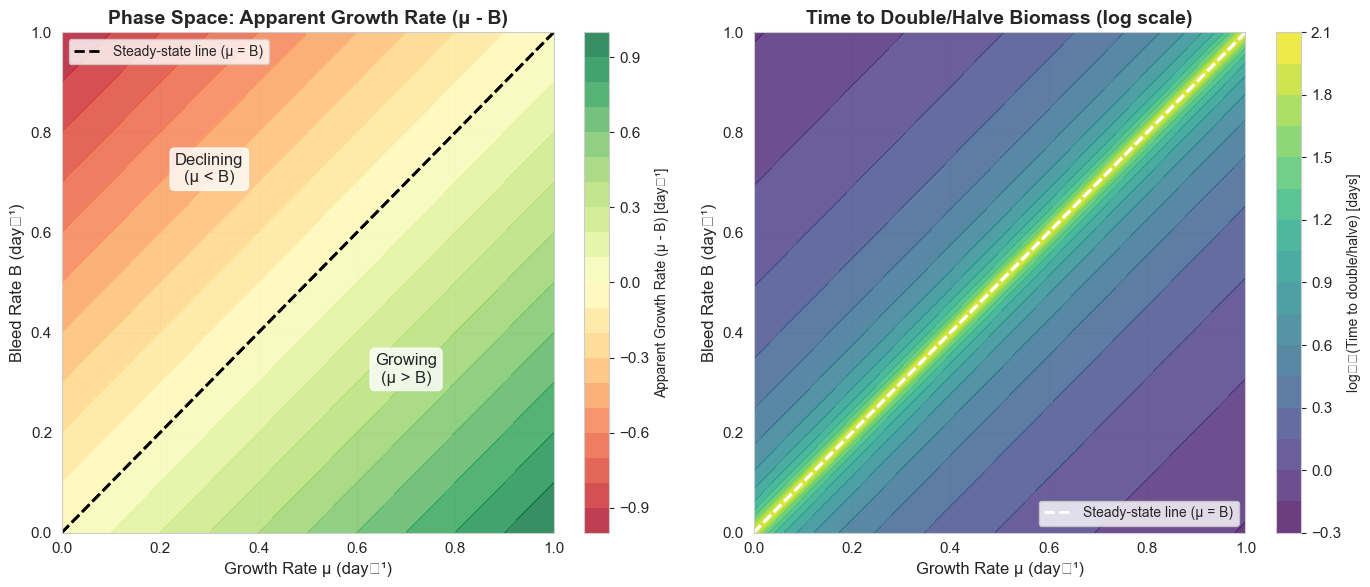

In [3]:
# Create a phase space diagram
μ_range = np.linspace(0, 1.0, 100)
B_range = np.linspace(0, 1.0, 100)
μ_grid, B_grid = np.meshgrid(μ_range, B_range)

# Apparent growth rate
apparent_growth = μ_grid - B_grid

# Time to double or halve (for visualization)
# For exponential: X = X0 * e^(r*t), so t = ln(2)/r for doubling
time_factor = np.zeros_like(apparent_growth)
time_factor[apparent_growth > 0.01] = np.log(2) / apparent_growth[apparent_growth > 0.01]
time_factor[apparent_growth < -0.01] = -np.log(2) / apparent_growth[apparent_growth < -0.01]
time_factor[np.abs(apparent_growth) < 0.01] = np.inf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Apparent growth rate contour
contour1 = ax1.contourf(μ_grid, B_grid, apparent_growth, levels=20, cmap='RdYlGn', alpha=0.8)
ax1.contour(μ_grid, B_grid, apparent_growth, levels=[0], colors='black', linewidths=2, linestyles='--')
ax1.plot(μ_range, μ_range, 'k--', linewidth=2, label='Steady-state line (μ = B)')
ax1.set_xlabel('Growth Rate μ (day⁻¹)', fontsize=12)
ax1.set_ylabel('Bleed Rate B (day⁻¹)', fontsize=12)
ax1.set_title('Phase Space: Apparent Growth Rate (μ - B)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(contour1, ax=ax1)
cbar1.set_label('Apparent Growth Rate (μ - B) [day⁻¹]', fontsize=10)

# Add annotations
ax1.text(0.7, 0.3, 'Growing\n(μ > B)', fontsize=12, ha='center', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax1.text(0.3, 0.7, 'Declining\n(μ < B)', fontsize=12, ha='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 2: Time to double/halve
contour2 = ax2.contourf(μ_grid, B_grid, np.log10(np.clip(time_factor, 0.1, 100)), 
                        levels=20, cmap='viridis', alpha=0.8)
ax2.contour(μ_grid, B_grid, apparent_growth, levels=[0], colors='white', linewidths=2, linestyles='--')
ax2.plot(μ_range, μ_range, 'w--', linewidth=2, label='Steady-state line (μ = B)')
ax2.set_xlabel('Growth Rate μ (day⁻¹)', fontsize=12)
ax2.set_ylabel('Bleed Rate B (day⁻¹)', fontsize=12)
ax2.set_title('Time to Double/Halve Biomass (log scale)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10, loc='lower right')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(contour2, ax=ax2)
cbar2.set_label('log₁₀(Time to double/halve) [days]', fontsize=10)

plt.tight_layout()
plt.show()


## 3. Numerical Integration: Approaching Steady State

Simulating the full dynamics using numerical integration to show the approach to steady-state.


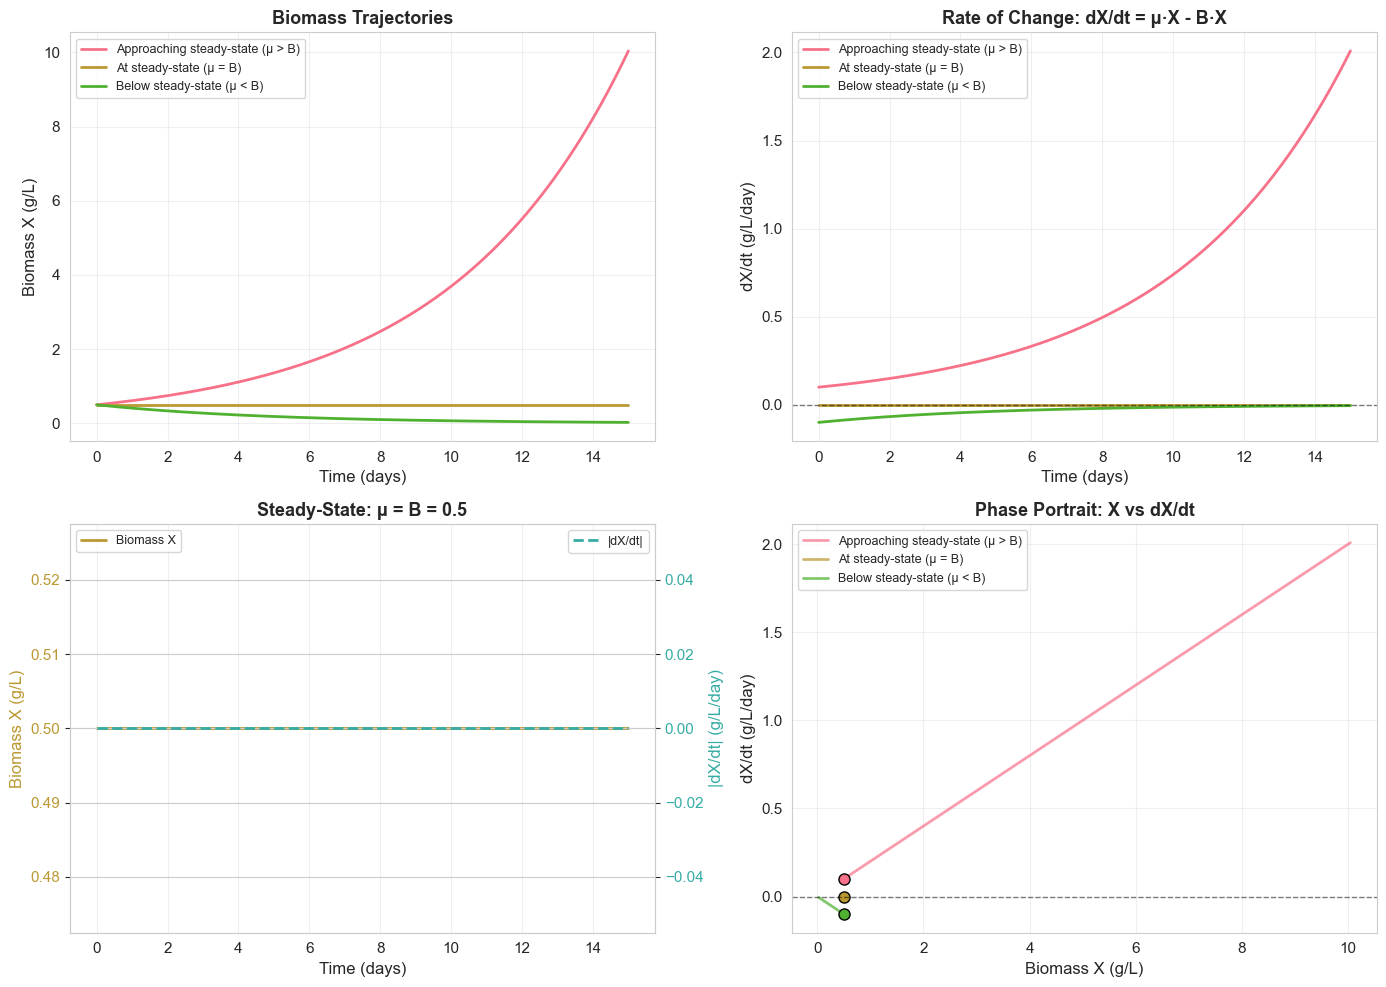

Steady-State Analysis:
When μ = B = 0.5: dX/dt = (μ - B)·X = 0·X = 0
Biomass remains constant at X = 0.5000 g/L
Final |dX/dt| ≈ 0.00e+00 g/L/day (essentially zero)


In [5]:
# Define the ODE system
def perfusion_dynamics(X, t, μ, B):
    """
    Perfusion bioreactor dynamics
    dX/dt = μ·X - B·X
    """
    dXdt = μ * X - B * X
    return dXdt

# Simulation parameters
X0 = 0.5  # Initial biomass (g/L)
t_sim = np.linspace(0, 15, 1000)  # 15 days simulation

# Different scenarios approaching steady-state
scenarios_steady = [
    {'μ': 0.6, 'B': 0.4, 'label': 'Approaching steady-state (μ > B)', 'color': colors[0]},
    {'μ': 0.5, 'B': 0.5, 'label': 'At steady-state (μ = B)', 'color': colors[1]},
    {'μ': 0.4, 'B': 0.6, 'label': 'Below steady-state (μ < B)', 'color': colors[2]},
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

# Plot 1: Biomass trajectories
for scenario in scenarios_steady:
    μ = scenario['μ']
    B = scenario['B']
    X_sol = odeint(perfusion_dynamics, X0, t_sim, args=(μ, B))
    ax1.plot(t_sim, X_sol[:, 0], label=scenario['label'], color=scenario['color'], linewidth=2)

ax1.set_xlabel('Time (days)', fontsize=12)
ax1.set_ylabel('Biomass X (g/L)', fontsize=12)
ax1.set_title('Biomass Trajectories', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Rate of change (dX/dt)
for scenario in scenarios_steady:
    μ = scenario['μ']
    B = scenario['B']
    X_sol = odeint(perfusion_dynamics, X0, t_sim, args=(μ, B))
    dXdt = μ * X_sol[:, 0] - B * X_sol[:, 0]
    ax2.plot(t_sim, dXdt, label=scenario['label'], color=scenario['color'], linewidth=2)

ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('Time (days)', fontsize=12)
ax2.set_ylabel('dX/dt (g/L/day)', fontsize=12)
ax2.set_title('Rate of Change: dX/dt = μ·X - B·X', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Approach to steady-state (focus on μ = B case)
μ_steady = 0.5
B_steady = 0.5
X_sol_steady = odeint(perfusion_dynamics, X0, t_sim, args=(μ_steady, B_steady))
dXdt_steady = μ_steady * X_sol_steady[:, 0] - B_steady * X_sol_steady[:, 0]

ax3.plot(t_sim, X_sol_steady[:, 0], color=colors[1], linewidth=2, label='Biomass X')
ax3_twin = ax3.twinx()
ax3_twin.plot(t_sim, np.abs(dXdt_steady), color=colors[3], linewidth=2, linestyle='--', label='|dX/dt|')
ax3.set_xlabel('Time (days)', fontsize=12)
ax3.set_ylabel('Biomass X (g/L)', fontsize=12, color=colors[1])
ax3_twin.set_ylabel('|dX/dt| (g/L/day)', fontsize=12, color=colors[3])
ax3.set_title('Steady-State: μ = B = 0.5', fontsize=13, fontweight='bold')
ax3.tick_params(axis='y', labelcolor=colors[1])
ax3_twin.tick_params(axis='y', labelcolor=colors[3])
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left', fontsize=9)
ax3_twin.legend(loc='upper right', fontsize=9)

# Plot 4: Phase portrait (X vs dX/dt)
for scenario in scenarios_steady:
    μ = scenario['μ']
    B = scenario['B']
    X_sol = odeint(perfusion_dynamics, X0, t_sim, args=(μ, B))
    dXdt = μ * X_sol[:, 0] - B * X_sol[:, 0]
    ax4.plot(X_sol[:, 0], dXdt, label=scenario['label'], color=scenario['color'], linewidth=2, alpha=0.7)
    # Mark start
    ax4.plot(X_sol[0, 0], dXdt[0], 'o', color=scenario['color'], markersize=8, markeredgecolor='black', markeredgewidth=1)

ax4.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax4.set_xlabel('Biomass X (g/L)', fontsize=12)
ax4.set_ylabel('dX/dt (g/L/day)', fontsize=12)
ax4.set_title('Phase Portrait: X vs dX/dt', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Steady-State Analysis:")
print("=" * 60)
print(f"When μ = B = 0.5: dX/dt = (μ - B)·X = 0·X = 0")
print(f"Biomass remains constant at X = {X_sol_steady[-1, 0]:.4f} g/L")
print(f"Final |dX/dt| ≈ {np.abs(dXdt_steady[-1]):.2e} g/L/day (essentially zero)")


## 4. Sensitivity Analysis: Effect of Parameter Variations

Exploring how small changes in μ and B affect the system dynamics.


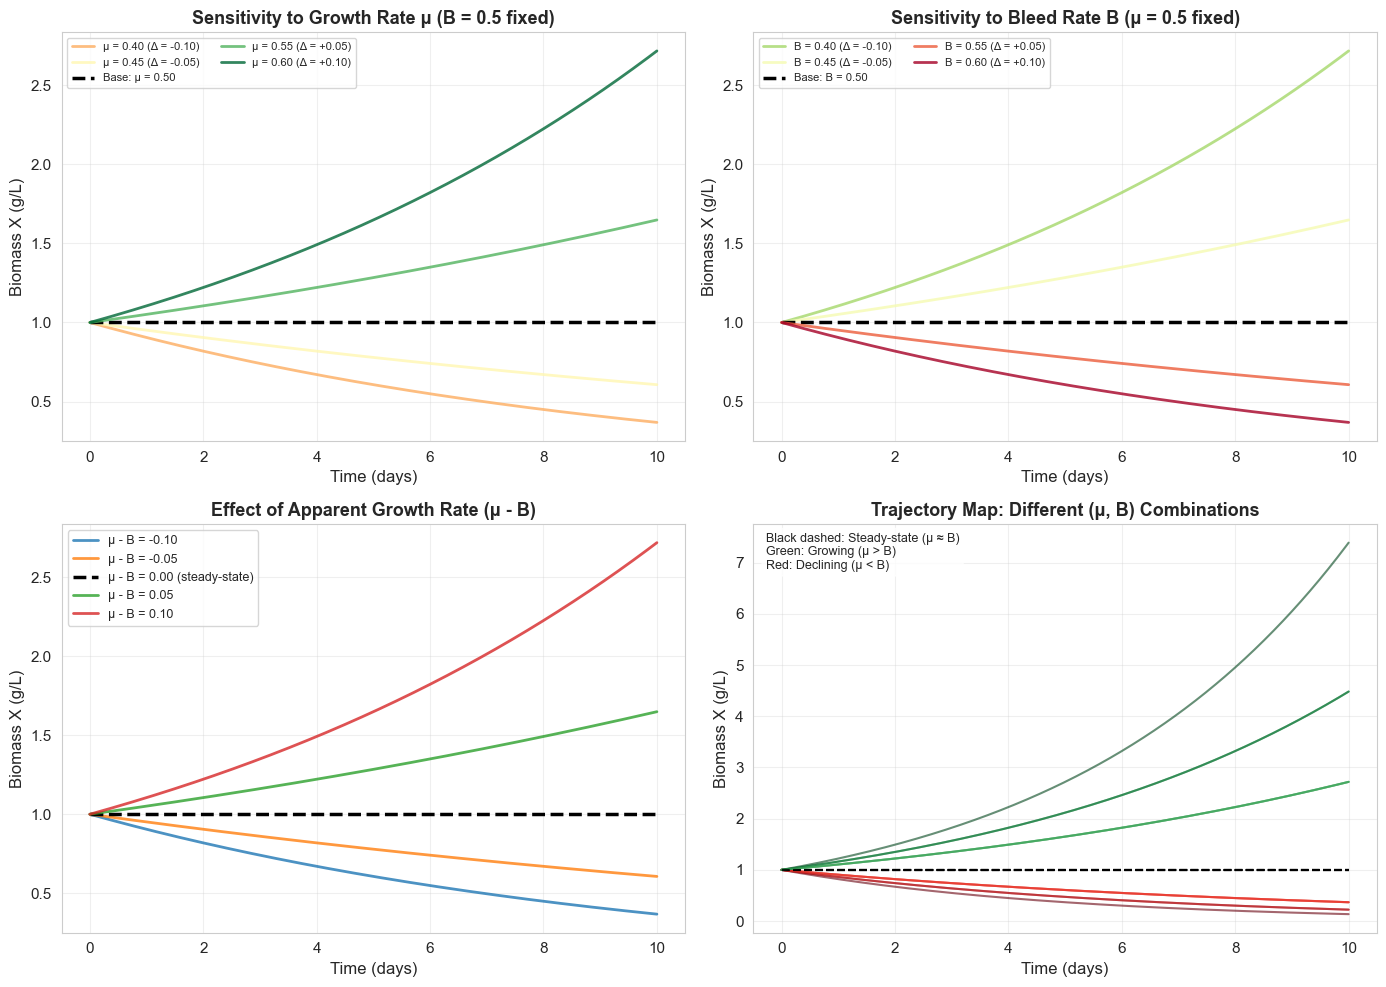

In [6]:
# Base case: near steady-state
μ_base = 0.5
B_base = 0.5
X0 = 1.0
t_sens = np.linspace(0, 10, 1000)

# Perturbations
perturbations = [-0.1, -0.05, 0, 0.05, 0.1]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

# Plot 1: Varying μ while B fixed
ax1.set_title('Sensitivity to Growth Rate μ (B = 0.5 fixed)', fontsize=13, fontweight='bold')
for pert in perturbations:
    μ = μ_base + pert
    X_sol = odeint(perfusion_dynamics, X0, t_sens, args=(μ, B_base))
    color_intensity = 0.3 + 0.7 * (pert + 0.1) / 0.2  # Normalize to [0.3, 1.0]
    if pert == 0:
        ax1.plot(t_sens, X_sol[:, 0], 'k--', linewidth=2.5, label=f'Base: μ = {μ:.2f}')
    else:
        ax1.plot(t_sens, X_sol[:, 0], color=plt.cm.RdYlGn(color_intensity), 
                linewidth=2, label=f'μ = {μ:.2f} (Δ = {pert:+.2f})', alpha=0.8)

ax1.set_xlabel('Time (days)', fontsize=12)
ax1.set_ylabel('Biomass X (g/L)', fontsize=12)
ax1.legend(fontsize=8, ncol=2)
ax1.grid(True, alpha=0.3)

# Plot 2: Varying B while μ fixed
ax2.set_title('Sensitivity to Bleed Rate B (μ = 0.5 fixed)', fontsize=13, fontweight='bold')
for pert in perturbations:
    B = B_base + pert
    X_sol = odeint(perfusion_dynamics, X0, t_sens, args=(μ_base, B))
    color_intensity = 0.3 + 0.7 * (pert + 0.1) / 0.2
    if pert == 0:
        ax2.plot(t_sens, X_sol[:, 0], 'k--', linewidth=2.5, label=f'Base: B = {B:.2f}')
    else:
        ax2.plot(t_sens, X_sol[:, 0], color=plt.cm.RdYlGn(1-color_intensity), 
                linewidth=2, label=f'B = {B:.2f} (Δ = {pert:+.2f})', alpha=0.8)

ax2.set_xlabel('Time (days)', fontsize=12)
ax2.set_ylabel('Biomass X (g/L)', fontsize=12)
ax2.legend(fontsize=8, ncol=2)
ax2.grid(True, alpha=0.3)

# Plot 3: Combined effect (μ - B)
ax3.set_title('Effect of Apparent Growth Rate (μ - B)', fontsize=13, fontweight='bold')
apparent_rates = [-0.1, -0.05, 0, 0.05, 0.1]
for app_rate in apparent_rates:
    μ = μ_base + app_rate / 2
    B = B_base - app_rate / 2  # Keep sum constant to show effect of difference
    X_sol = odeint(perfusion_dynamics, X0, t_sens, args=(μ, B))
    if app_rate == 0:
        ax3.plot(t_sens, X_sol[:, 0], 'k--', linewidth=2.5, label=f'μ - B = {app_rate:.2f} (steady-state)')
    else:
        ax3.plot(t_sens, X_sol[:, 0], linewidth=2, label=f'μ - B = {app_rate:.2f}', alpha=0.8)

ax3.set_xlabel('Time (days)', fontsize=12)
ax3.set_ylabel('Biomass X (g/L)', fontsize=12)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Parameter space with trajectories
μ_vals = [0.4, 0.45, 0.5, 0.55, 0.6]
B_vals = [0.4, 0.45, 0.5, 0.55, 0.6]

ax4.set_title('Trajectory Map: Different (μ, B) Combinations', fontsize=13, fontweight='bold')
for μ in μ_vals:
    for B in B_vals:
        X_sol = odeint(perfusion_dynamics, X0, t_sens, args=(μ, B))
        app_rate = μ - B
        if abs(app_rate) < 0.01:
            color = 'black'
            linestyle = '--'
            alpha = 0.8
        elif app_rate > 0:
            color = plt.cm.Greens(0.3 + 0.7 * min(app_rate / 0.2, 1))
            linestyle = '-'
            alpha = 0.6
        else:
            color = plt.cm.Reds(0.3 + 0.7 * min(abs(app_rate) / 0.2, 1))
            linestyle = '-'
            alpha = 0.6
        
        if abs(app_rate) < 0.01 or abs(app_rate) > 0.08:
            ax4.plot(t_sens, X_sol[:, 0], color=color, linestyle=linestyle, alpha=alpha, linewidth=1.5)

ax4.set_xlabel('Time (days)', fontsize=12)
ax4.set_ylabel('Biomass X (g/L)', fontsize=12)
ax4.grid(True, alpha=0.3)
ax4.text(0.02, 0.98, 'Black dashed: Steady-state (μ ≈ B)\nGreen: Growing (μ > B)\nRed: Declining (μ < B)', 
         transform=ax4.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


## 5. Mass Balance Visualization

Visualizing the relationship between perfusion rate (P), bleed rate (B), and harvest rate (H) according to the constraint: $P = B + H$


/var/folders/jd/c82nbb150v12m21zq2k4xlzh0000gn/T/ipykernel_24314/2574188817.py:39: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()


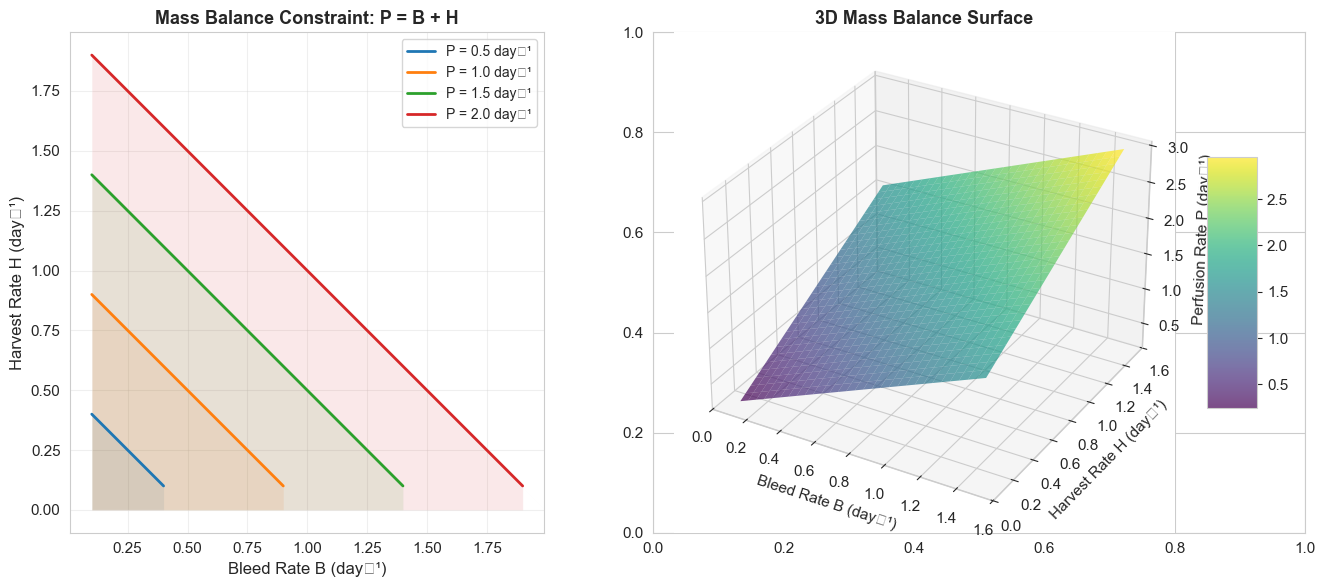

Mass Balance Examples:
P = 1.0 day⁻¹, B = 0.3 day⁻¹ → H = 0.7 day⁻¹
  Verification: 0.3 + 0.7 = 1.0 ✓
P = 1.5 day⁻¹, B = 0.5 day⁻¹ → H = 1.0 day⁻¹
  Verification: 0.5 + 1.0 = 1.5 ✓
P = 2.0 day⁻¹, B = 0.7 day⁻¹ → H = 1.3 day⁻¹
  Verification: 0.7 + 1.3 = 2.0 ✓


In [7]:
# Mass balance constraint: P = B + H
P_range = np.linspace(0.1, 2.0, 50)
B_range = np.linspace(0.1, 1.5, 50)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1, ax2 = axes

# Plot 1: Feasible region for different P values
for P in [0.5, 1.0, 1.5, 2.0]:
    B_vals = np.linspace(0.1, P - 0.1, 100)
    H_vals = P - B_vals
    ax1.plot(B_vals, H_vals, linewidth=2, label=f'P = {P} day⁻¹')
    ax1.fill_between(B_vals, H_vals, alpha=0.1)

ax1.set_xlabel('Bleed Rate B (day⁻¹)', fontsize=12)
ax1.set_ylabel('Harvest Rate H (day⁻¹)', fontsize=12)
ax1.set_title('Mass Balance Constraint: P = B + H', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal', adjustable='box')

# Plot 2: 3D surface showing the constraint
from mpl_toolkits.mplot3d import Axes3D

B_grid = np.linspace(0.1, 1.5, 30)
H_grid = np.linspace(0.1, 1.5, 30)
B_mesh, H_mesh = np.meshgrid(B_grid, H_grid)
P_mesh = B_mesh + H_mesh

ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(B_mesh, H_mesh, P_mesh, cmap='viridis', alpha=0.7, 
                        linewidth=0, antialiased=True)
ax2.set_xlabel('Bleed Rate B (day⁻¹)', fontsize=11)
ax2.set_ylabel('Harvest Rate H (day⁻¹)', fontsize=11)
ax2.set_zlabel('Perfusion Rate P (day⁻¹)', fontsize=11)
ax2.set_title('3D Mass Balance Surface', fontsize=13, fontweight='bold')
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# Print example calculations
print("Mass Balance Examples:")
print("=" * 60)
examples = [
    {'P': 1.0, 'B': 0.3, 'H': None},
    {'P': 1.5, 'B': 0.5, 'H': None},
    {'P': 2.0, 'B': 0.7, 'H': None},
]
for ex in examples:
    ex['H'] = ex['P'] - ex['B']
    print(f"P = {ex['P']:.1f} day⁻¹, B = {ex['B']:.1f} day⁻¹ → H = {ex['H']:.1f} day⁻¹")
    print(f"  Verification: {ex['B']:.1f} + {ex['H']:.1f} = {ex['P']:.1f} ✓")


## 6. Interactive Exploration: Time Evolution with Different Initial Conditions

Showing how the system evolves from different starting points.


/var/folders/jd/c82nbb150v12m21zq2k4xlzh0000gn/T/ipykernel_24314/3763392785.py:48: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


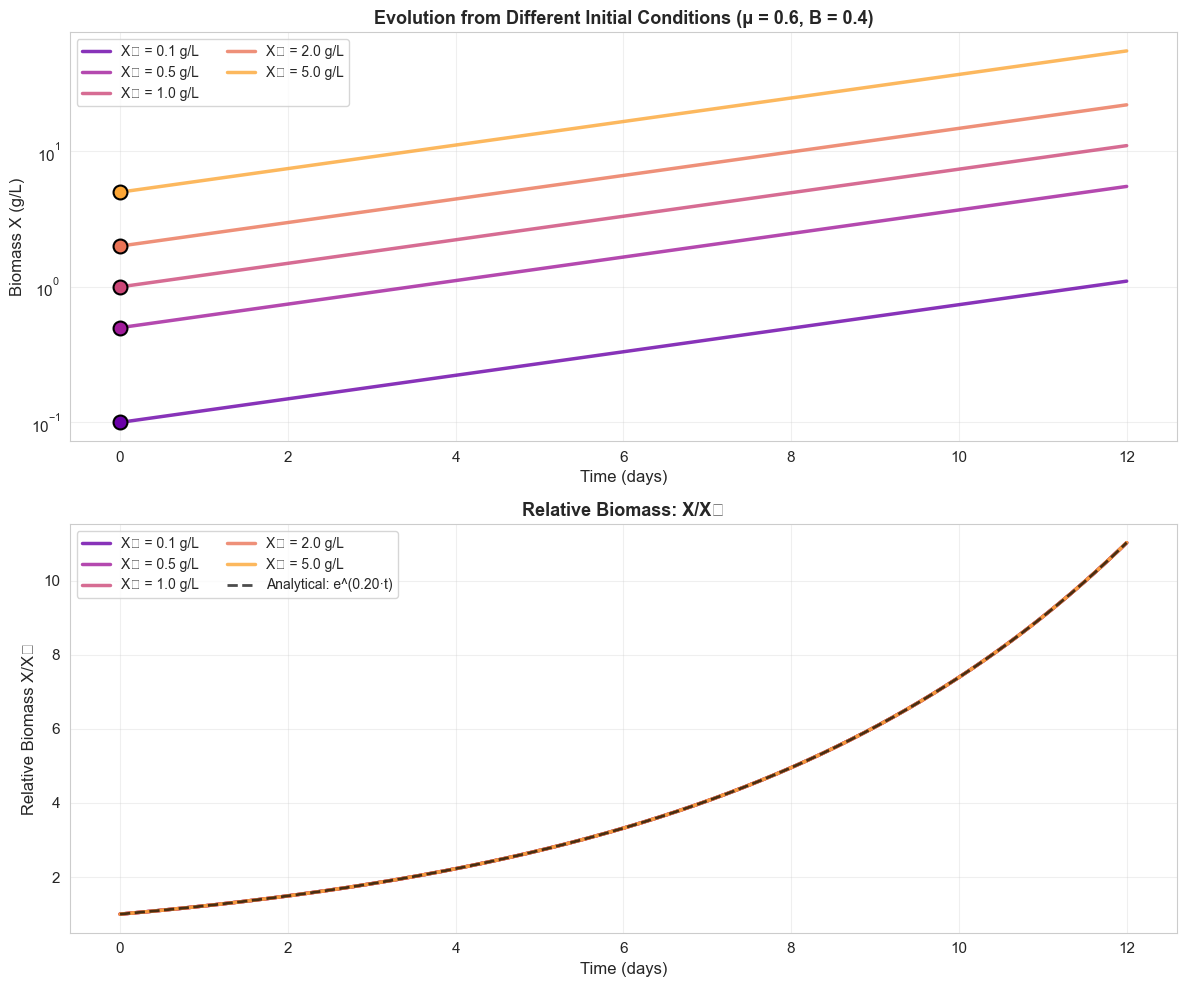

Key Insight:
With μ = 0.6 and B = 0.4, the apparent growth rate is 0.20 day⁻¹
All trajectories follow the same relative growth: X(t)/X₀ = e^(0.20·t)
Regardless of initial condition, the system grows exponentially at the same rate.


In [8]:
# Fixed parameters
μ = 0.6
B = 0.4
t_evo = np.linspace(0, 12, 1000)

# Different initial conditions
initial_conditions = [0.1, 0.5, 1.0, 2.0, 5.0]

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
ax1, ax2 = axes

# Plot 1: Trajectories from different X0
colors_ic = plt.cm.plasma(np.linspace(0.2, 0.8, len(initial_conditions)))
for i, X0 in enumerate(initial_conditions):
    X_sol = odeint(perfusion_dynamics, X0, t_evo, args=(μ, B))
    ax1.plot(t_evo, X_sol[:, 0], color=colors_ic[i], linewidth=2.5, 
            label=f'X₀ = {X0:.1f} g/L', alpha=0.8)
    ax1.plot(0, X0, 'o', color=colors_ic[i], markersize=10, markeredgecolor='black', markeredgewidth=1.5)

# Steady-state line (if it exists, but with μ > B, there's no finite steady-state)
# Instead, show the exponential growth trend
ax1.set_xlabel('Time (days)', fontsize=12)
ax1.set_ylabel('Biomass X (g/L)', fontsize=12)
ax1.set_title(f'Evolution from Different Initial Conditions (μ = {μ}, B = {B})', 
             fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, ncol=2, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Plot 2: Relative growth (X/X0)
ax2.set_title('Relative Biomass: X/X₀', fontsize=13, fontweight='bold')
for i, X0 in enumerate(initial_conditions):
    X_sol = odeint(perfusion_dynamics, X0, t_evo, args=(μ, B))
    relative = X_sol[:, 0] / X0
    ax2.plot(t_evo, relative, color=colors_ic[i], linewidth=2.5, 
            label=f'X₀ = {X0:.1f} g/L', alpha=0.8)

# Analytical solution: X/X0 = exp((μ-B)*t)
analytical_relative = np.exp((μ - B) * t_evo)
ax2.plot(t_evo, analytical_relative, 'k--', linewidth=2, 
        label=f'Analytical: e^({μ-B:.2f}·t)', alpha=0.7)

ax2.set_xlabel('Time (days)', fontsize=12)
ax2.set_ylabel('Relative Biomass X/X₀', fontsize=12)
ax2.legend(fontsize=10, ncol=2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insight:")
print("=" * 60)
print(f"With μ = {μ} and B = {B}, the apparent growth rate is {μ - B:.2f} day⁻¹")
print(f"All trajectories follow the same relative growth: X(t)/X₀ = e^({μ-B:.2f}·t)")
print(f"Regardless of initial condition, the system grows exponentially at the same rate.")


## Summary

This visualization demonstrates the key non-linear dynamics of the perfusion process:

1. **Exponential Dynamics**: The system exhibits exponential growth or decay based on the apparent growth rate (μ - B)
2. **Steady-State Condition**: When μ = B, the system reaches steady-state with dX/dt = 0
3. **Mass Balance Constraint**: The perfusion rate must equal the sum of bleed and harvest rates (P = B + H)
4. **Parameter Sensitivity**: Small changes in μ or B can significantly affect system behavior
5. **Initial Condition Independence**: The relative growth rate is independent of initial biomass concentration

The non-linearity arises from the multiplicative term μ·X in the growth equation, making the system behavior highly dependent on the current state.
